In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
df_final = pd.read_csv(r'c:\mydata\G8Vitamin\data\final\LOCMM_08062025_DATASET_VITAMINd.csv')

# # === Step 1: Create label from VitaminD ===
# def assign_label(x):
#     if pd.isna(x):
#         return None
#     elif x < 50:
#         return 0
#     elif x >= 50 and x < 125:
#         return 1
#     else:
#         return 2

# df_final['label'] = df_final['VitaminD'].apply(assign_label)

# === Bước 2: Trích năm đầu tiên từ chuỗi "2001-2002" ===
# df_final['YearStart'] = df_final['YearID'].astype(str).str.extract(r'(\d{4})').astype(int)
# Tách năm bắt đầu thành cột số nguyên để dễ xử lý
df_final['YearStart'] = df_final['YearID'].str[:4].astype(int)

# Xử lý cho dữ liệu từ 2001–2012
df1 = df_final[df_final['YearStart'] < 2013].copy()
df1.loc[df1['SmokeFam'] == 2, 'SmokeFam'] = 1
df1 = df1[df1['SmokeFam'] <= 1]

# Xử lý cho dữ liệu từ 2013 trở đi
df2 = df_final[df_final['YearStart'] >= 2013].copy()
df2.loc[(df2['SmokeFam'] >= 1.0) & (df2['SmokeFam'] <= 3.0), 'SmokeFam'] = 1
df2 = df2[df2['SmokeFam'] <= 1]
df_final = pd.concat([df1,df2])

def binary_vitamin_d_label(row):
    val = row['VitaminD']
    year = row['YearStart']

    if pd.isna(val) or pd.isna(year):
        return None  # hoặc np.nan

    if year in [2001, 2003]:
        return 1 if val < 20 else 0
    else:
        return 1 if val < 50 else 0

df_final['label'] = df_final.apply(binary_vitamin_d_label, axis=1)

# === Bước 3: Tách dữ liệu theo mốc năm 2013 ===
df_final_train = df_final[df_final['YearStart'] <= 2013]
df_final_test = df_final[df_final['YearStart'] > 2013]

# === Bước 4: Ghi ra file CSV ===
df_final_train.to_csv(r'c:\mydata\G8Vitamin\data\final\08062025_hba1c\train.csv', index=False)
df_final_test.to_csv(r'c:\mydata\G8Vitamin\data\final\08062025_hba1c\test.csv', index=False)

# === Log số dòng để xác nhận ===
print(f"✅ Số dòng train: {len(df_final_train)} được lưu vào train.csv")
print(f"✅ Số dòng test : {len(df_final_test)} được lưu vào test.csv")


✅ Số dòng train: 21174 được lưu vào train.csv
✅ Số dòng test : 3873 được lưu vào test.csv


In [95]:
# Read files train
df = pd.read_csv(r'c:\mydata\G8Vitamin\data\final\08062025_hba1c\train.csv')

C:\Users\iseT1enLoc\AppData\Local\Temp\ipykernel_7512\2486612787.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='label', data=df, palette='viridis')


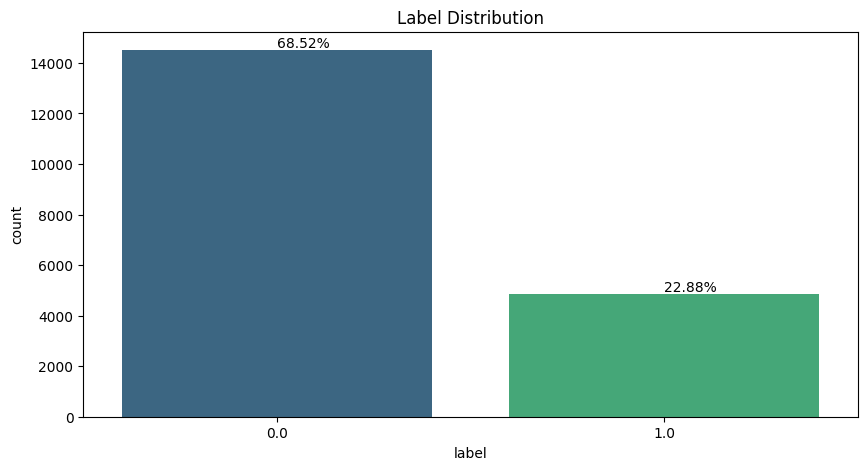

In [96]:
# Draw label distribution
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='label', data=df, palette='viridis')
plt.title('Label Distribution')
for i, rec in enumerate(ax.patches):
    ax.text(
        rec.get_x() + rec.get_width()/2,
        rec.get_height() + 100,
        f'{rec.get_height()/len(df)*100:.2f}%',
    )
plt.show()

### 1. Handle Missing value

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21174 entries, 0 to 21173
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SEQN                      21174 non-null  float64
 1   Gender                    21174 non-null  float64
 2   Age                       21174 non-null  float64
 3   Race                      21174 non-null  float64
 4   familysize                21174 non-null  float64
 5   PIR                       19737 non-null  float64
 6   BMXWT                     20825 non-null  float64
 7   BMXHT                     20855 non-null  float64
 8   BMI                       20746 non-null  float64
 9   WaistCircumference        20195 non-null  float64
 10  FastingGlucose            19905 non-null  float64
 11  ALT                       19637 non-null  float64
 12  AST                       19634 non-null  float64
 13  AlkalinePhosphotase       19662 non-null  float64
 14  Choles

In [98]:
# Drop columns not used fully
cols_drop = [
    "SEQN", "HBsAg", "FastingGlucose",
    "CreatinineUmol", 
]

df.drop(columns=cols_drop, inplace=True)

In [99]:
def check_missing_ratio(df_check):
    ratio_completeness = []
    for column in df_check.columns:
        completeness_ratio = df_check[column].notnull().sum() / len(df_check)
        ratio_completeness.append(completeness_ratio)

    # Draw ratio
    plt.figure(figsize=(20, 10)) # type: ignore
    plt.title("Completeness Ratio")
    ax = sns.barplot(y=df_check.columns, x=ratio_completeness, palette='viridis')

    for i, rec in enumerate(ax.patches):
        ax.text(
            rec.get_x() + rec.get_width(),
            rec.get_y() + rec.get_height()/2,
            f'{ratio_completeness[i]:.2%}',
        )

C:\Users\iseT1enLoc\AppData\Local\Temp\ipykernel_7512\1027853617.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=df_check.columns, x=ratio_completeness, palette='viridis')


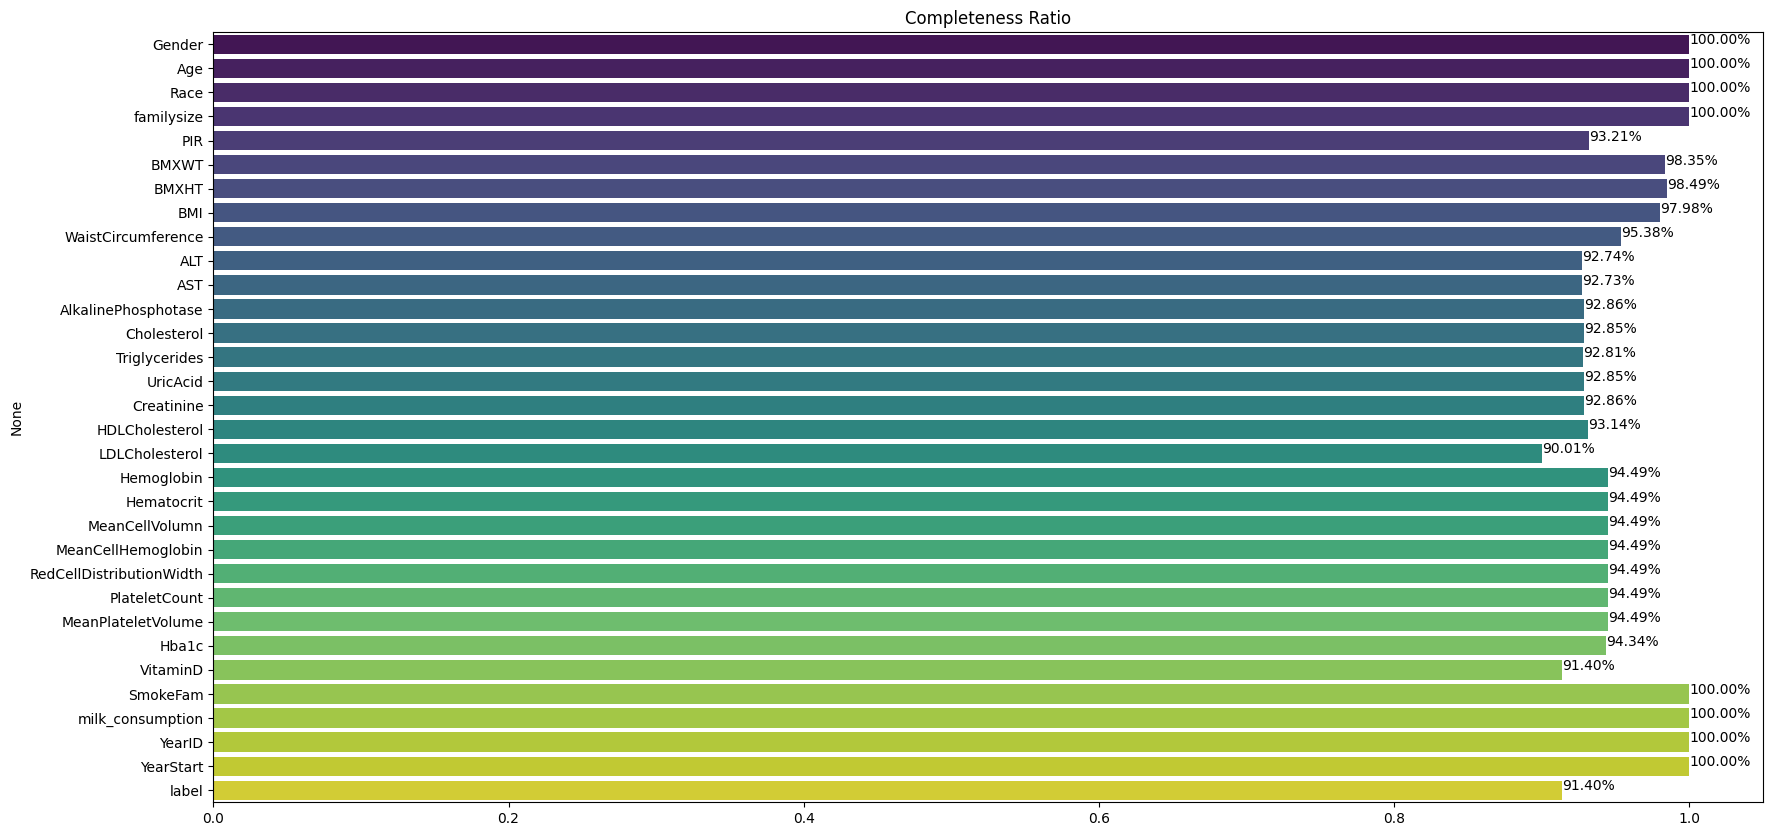

In [100]:
check_missing_ratio(df)

In [101]:
# Drop null vitamin D
df.dropna(subset=['VitaminD'], inplace=True)

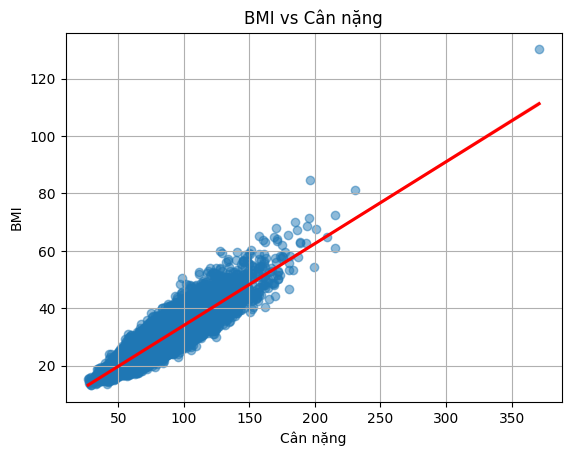

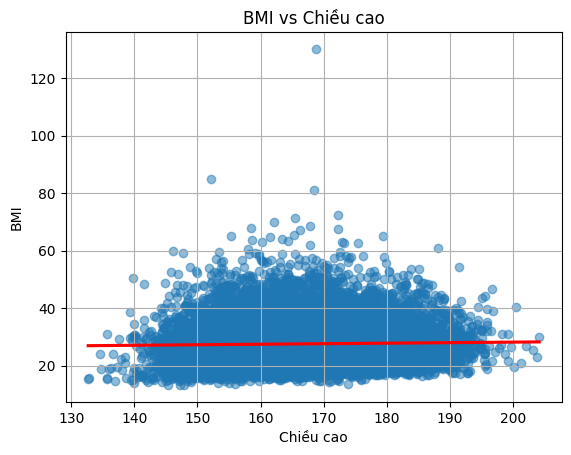

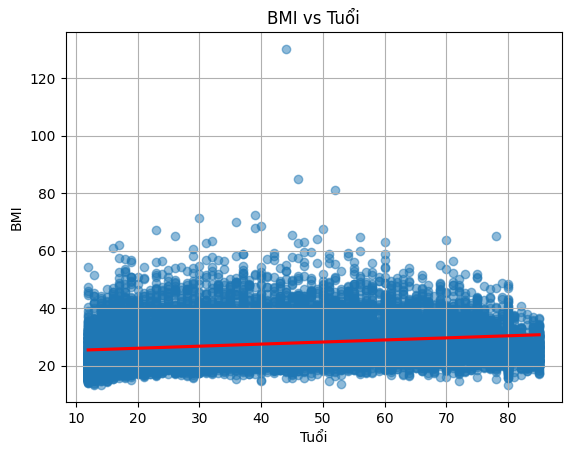

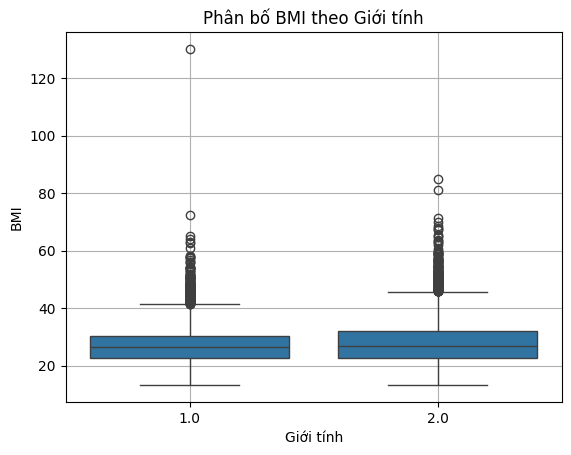

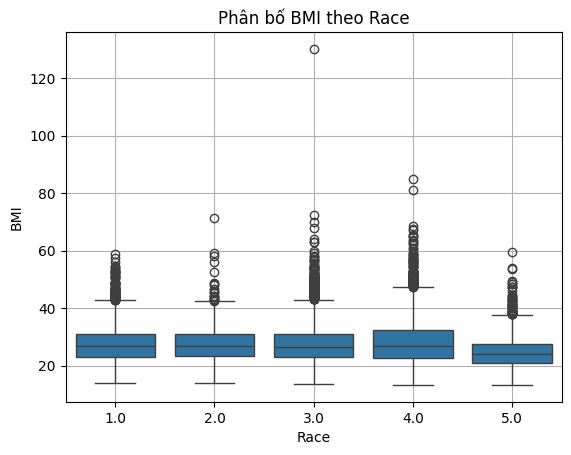

In [102]:
# Vòng eo vs BMI
sns.regplot(x='BMXWT', y='BMI', data=df, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('BMI vs Cân nặng')
plt.xlabel('Cân nặng')
plt.ylabel('BMI')
plt.grid(True)
plt.show()

# Vòng eo vs BMI
sns.regplot(x='BMXHT', y='BMI', data=df, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('BMI vs Chiều cao')
plt.xlabel('Chiều cao')
plt.ylabel('BMI')
plt.grid(True)
plt.show()

# Age vs BMI
if 'Age' in df.columns:
    sns.regplot(x='Age', y='BMI', data=df, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
    plt.title('BMI vs Tuổi')
    plt.xlabel('Tuổi')
    plt.ylabel('BMI')
    plt.grid(True)
    plt.show()

# Gender vs BMI
if 'Gender' in df.columns:
    sns.boxplot(x='Gender', y='BMI', data=df)
    plt.title('Phân bố BMI theo Giới tính')
    plt.xlabel('Giới tính')
    plt.ylabel('BMI')
    plt.grid(True)
    plt.show()

# Race vs BMI
if 'Race' in df.columns:
    sns.boxplot(x='Race', y='BMI', data=df)
    plt.title('Phân bố BMI theo Race')
    plt.xlabel('Race')
    plt.ylabel('BMI')
    plt.grid(True)
    plt.show()

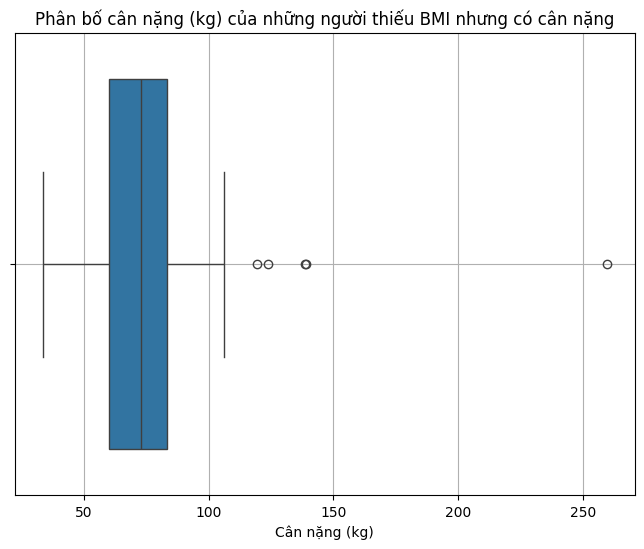

In [103]:
# Get row has not null weight but null BMI
missing_bmi_weights = df.loc[pd.isna(df['BMI']) & pd.notna(df['BMXWT']), 'BMXWT']

# Draw boxplot for missing BMI but has weight
plt.figure(figsize=(8, 6))
sns.boxplot(x=missing_bmi_weights)
plt.title('Phân bố cân nặng (kg) của những người thiếu BMI nhưng có cân nặng')
plt.xlabel('Cân nặng (kg)')
plt.grid(True)
plt.show()

In [104]:
# calculate Q1, Q3 và IQR
Q1 = missing_bmi_weights.quantile(0.25)
Q3 = missing_bmi_weights.quantile(0.75)
IQR = Q3 - Q1

# lowwer_bound and upper_bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f'Q1 (25%): {Q1}')
print(f'Q3 (75%): {Q3}')
print(f'IQR: {IQR}')
print(f'Ngưỡng dưới (Lower bound): {lower_bound}')
print(f'Ngưỡng trên (Upper bound): {upper_bound}')

Q1 (25%): 60.1
Q3 (75%): 83.5
IQR: 23.4
Ngưỡng dưới (Lower bound): 25.000000000000007
Ngưỡng trên (Upper bound): 118.6


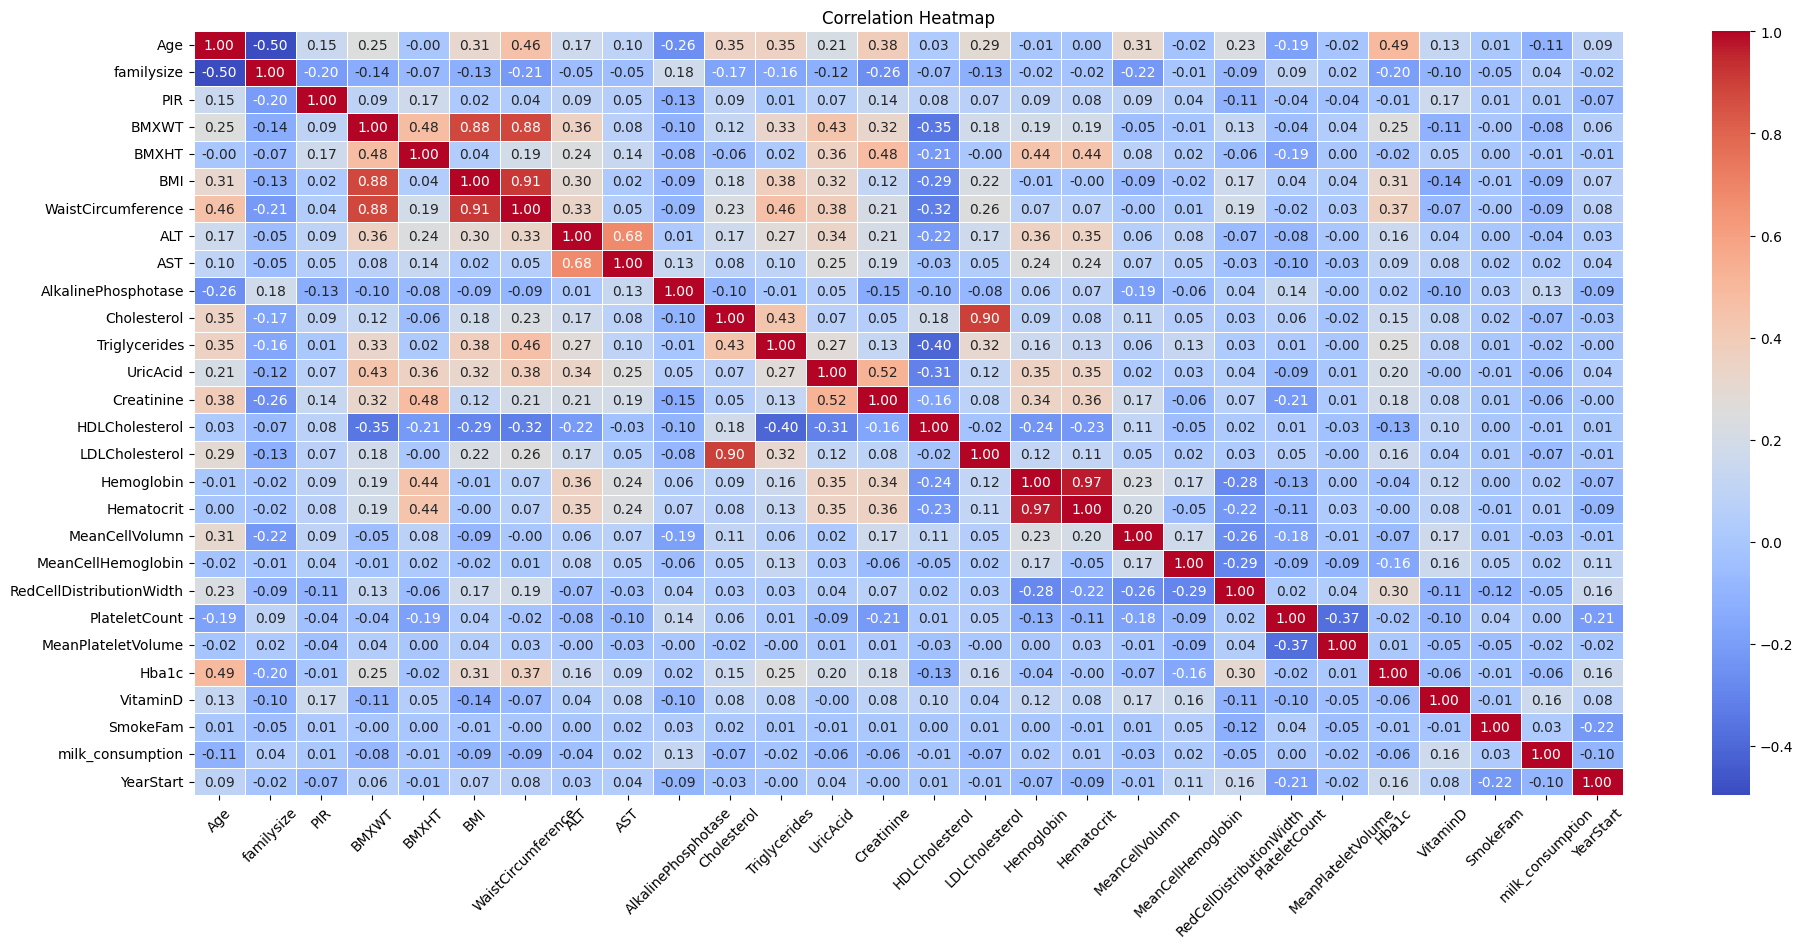

In [105]:
df_corr = df.copy()
df_corr.drop(columns=[
    "Gender", "Race", 
    "label", "YearID",
], inplace=True)

# Check consistency between columns with spearman correlation
correlation_matrix = df_corr.corr(method = "spearman")

plt.figure(figsize=(20, 10))  # Kích thước biểu đồ
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

In [106]:
# Imputation LDL cholesterol
for index, col in enumerate(['LDLCholesterol', 'HDLCholesterol', 'Triglycerides']):
    for i, row in df.iterrows():
        if pd.isnull(row[col]):
            TotalCholesterol = row['Cholesterol']
            a = ''
            b = ''
            c = 0
            if col == 'LDLCholesterol':
                a = row['HDLCholesterol']
                b = row['Triglycerides']
            elif col == 'HDLCholesterol':
                a = row['LDLCholesterol']
                b = row['Triglycerides']
            else:
                a = row['LDLCholesterol']
                b = row['HDLCholesterol']
            if pd.isnull(TotalCholesterol) or pd.isnull(a) or pd.isnull(b):
                    continue
            
            # Calculate LDL cholesterol using Friedewald formula
            if col == 'Triglycerides':
                c = (TotalCholesterol - a - b)*5
            else:
                c = TotalCholesterol - a - b/5
            df.loc[i, col] = c

In [108]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Step 1: Filter rows for training
features_predict = ['WaistCircumference', 'Triglycerides', 'Hba1c', 'BMXWT']
feature_target = 'BMI'
df_train = df[features_predict + [feature_target]].dropna()

# Step 2: Input (X) và target (y)
X = df_train[features_predict]
y = df_train[feature_target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale X_train
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 3: Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Đánh giá MSE
y_train_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_train_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")

# Step 5: Predict missing BMI
df_predict = df[
    df[feature_target].isnull() &
    df[features_predict].notnull().all(axis=1)
]

df_predict_missing = scaler.transform(df_predict[features_predict])

# Step 6: Fill missing BMI
if not df_predict.empty:
    predicted_bmi = model.predict(df_predict_missing)
    df.loc[df_predict.index, feature_target] = predicted_bmi
    print(f"Filled {len(df_predict)} missing BMI values.")
else:
    print("No eligible missing BMI values to fill.")


Mean Squared Error (MSE): 6.4177
Filled 50 missing BMI values.


C:\Users\iseT1enLoc\AppData\Local\Temp\ipykernel_7512\1027853617.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=df_check.columns, x=ratio_completeness, palette='viridis')


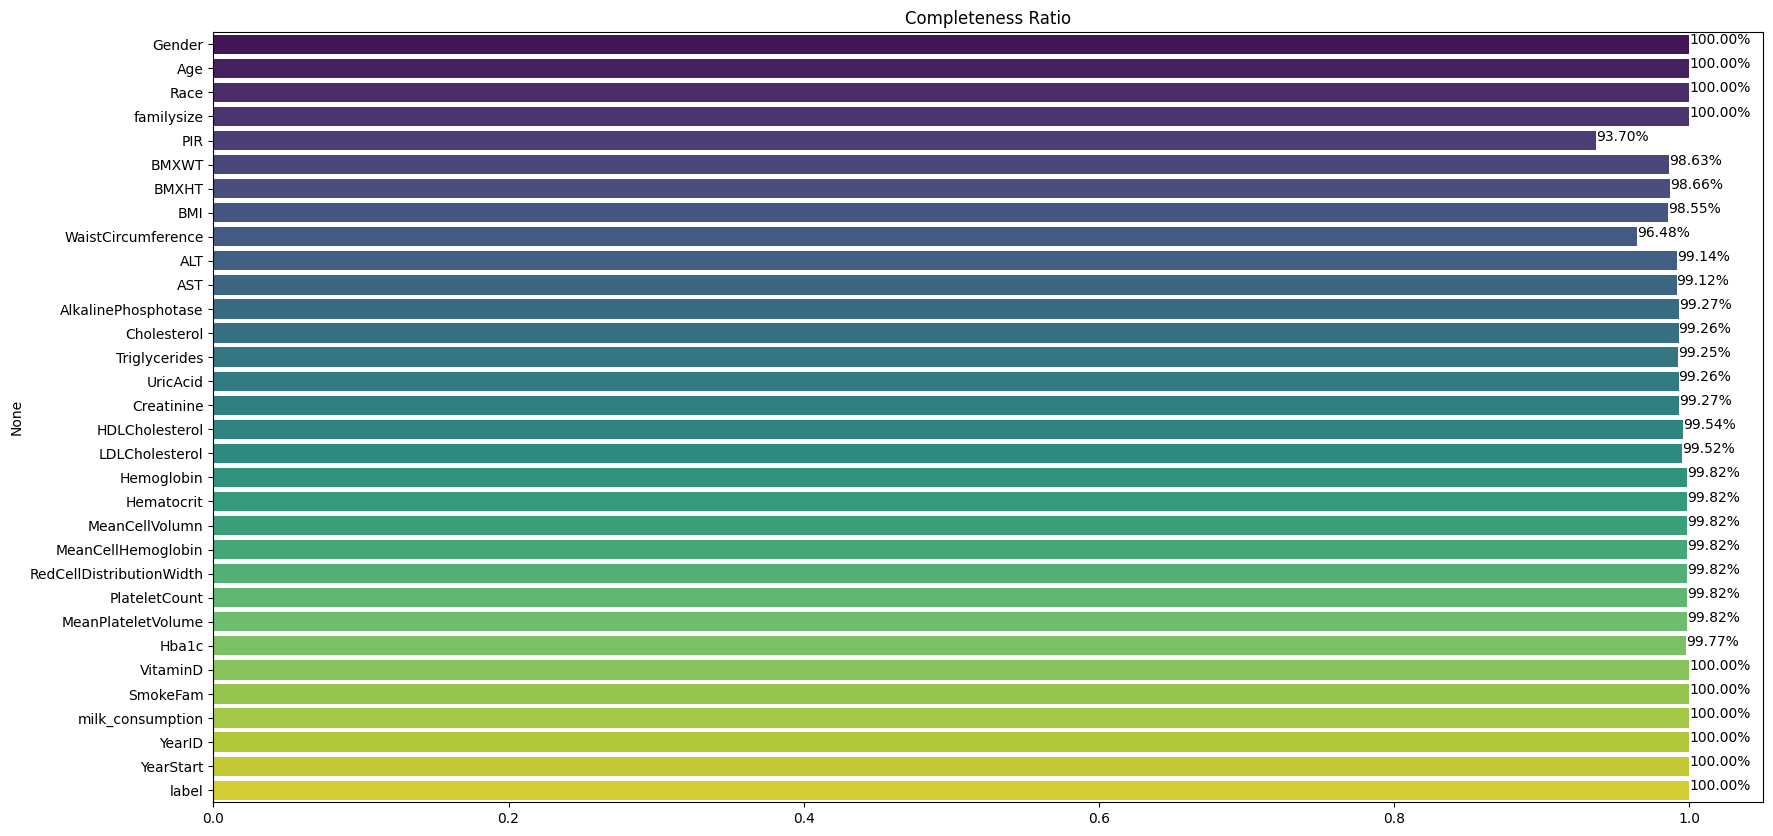

In [109]:
check_missing_ratio(df)

In [110]:
columns_list = df.columns.tolist()

# remove WaistCircumference from columns_list
if 'WaistCircumference' in columns_list:
    columns_list.remove('WaistCircumference')

# drop null values
df.dropna(subset=columns_list, inplace=True)


### 2. Handle outlier

In [111]:
# Create dict to convert rate to measure
measures_dict = {
    "BMI": { # kg/m^2
        "both":{
            "1": 18.4, # <18.4
            "2": 24.9, # 18.4 <= x < 24.9
            "3": 30, # 24.9 <= x < 30
            "4": 30 # >= 30
        }
    },

    "WaistCircumference": {  # cm
        "male":{
            "1": 94, # <94
            "2": 102, # 94 <= x < 102
            "3": 102, # >= 102
        }, 
        "female": {
            "1": 80, # <80
            "2": 88, # 80 <= x < 88
            "3": 88 # >= 88
        }
    },

    "HDLCholesterol": { # mg/dl
        "both":{
            "1": 40, # <40
            "2": 60, # 40 <= x < 60
            "3": 60 # >= 60
        }  
    },

    "Triglycerides":{ # mg/dl
        "both":{
            "1": 150, # <150
            "2": 200, # 150 <= x < 200
            "3": 200, # >= 200
        }
    },

    "LDLCholesterol": { # mg/dl
        "both":{
            "1": 100, # <100
            "2": 160, # 100 <= x < 160
            "3": 160 # >= 160
        }
    },

    "Hba1c": { # %
        "both":{
            "1": 5.7, # <5.7
            "2": 6.5, # 5.7 <= x < 6.5
            "3": 6.5 # >= 6.5
        }
    },

    "ALT": { # U/L
        "male": {
            "1": 0, # <0
            "2": 41, # 0 <= x < 41
            "3": 41 # >= 41
        },
        "female":{
            "1": 0, # <0
            "2": 32, # 0 <= x < 32
            "3": 32 # >= 31
        }
    },

    "AST": {  # U/L
        "male": {
            "1": 0, # <0
            "2": 38, # 0 <= x < 38
            "3": 38 # >= 40
        },
        "female":{
            "1": 0, # <0
            "2": 32, # 0 <= x < 32
            "3": 32 # >= 32
        }
    },

    "AlkalinePhosphotase":{ # U/L
        "male": {
            "1": 40, # < 40
            "2": 130, # 40 <= x < 130
            "3": 130 # >= 130
        },
        "female":{
            "1": 35, # < 35
            "2": 105, # 35 <= x < 105
            "3": 105 # >= 105
        }
    },

    "Creatinine":{  # mg/dl
        "male": {
            "1": 0.67, # <0.67
            "2": 1.18, # 0.67 <= x < 1.18,
            "3": 1.18 # >= 1.18
        },
        "female":{
            "1": 0.51, # < 0.51
            "2": 0.96, # 0.51 <= x < 0.96
            "3": 0.96 # >= 0.96
        }
    },
    
    "UricAcid": { # mng/dl
        "male": {
            "1": 3.4, # <3.4
            "2": 7.1, # 3.4 <= x < 7.1
            "3": 7.1 # >= 7.1
        }, 

        "female": {
            "1": 2.4, # < 2.4
            "2": 5.8, # 2.4 <= x < 5.8
            "3": 5.8 # >= 5.8
        }
    }
}

In [112]:
col_blood_dict = {
    "Hemoglobin": {
        "min": 10.7,
        "max": 17.1
    },
    "Hematocrit": {
        "min": 32.1,
        "max": 50.9
    },
    "MeanCellVolumn": {
        "min": 68.2,
        "max": 102.7
    },
    "MeanCellHemoglobin": {
        "min": 22.3,
        "max": 35
    },
    "RedCellDistributionWidth": {
        "min": 11.4,
        "max": 16.2
    },
    "PlateletCount": {
        "min": 155,
        "max": 547
    },
    "MeanPlateletVolume": {
        "min": 6.1,
        "max": 10.2
    }
}

In [113]:
# Drop outlier value
'''
   Strategy to check outlier:
    1. Use boxplot to visualize outliers
    2. Use Z-score to detect outliers
      2.1 If Z-score > 3 and greater than max normal range value => outlier
    3. Measure Consistency ratio
'''
          
def check_and_drop_outlier(df_check):
    df_dq = df_check.copy()
    for col in df_dq.columns:
        if col in measures_dict.keys():
          # Calculate Z-score of column
          z_score = (df_dq[col] - df_dq[col].mean()) / df_dq[col].std()
          max_value = 0
          min_value = 0
          if measures_dict[col].get("both"):
            # get max value and min value
            max_value = max(measures_dict[col]["both"].values())
            min_value = min(measures_dict[col]["both"].values())

            # check outlier
            outlier_condition = (abs(z_score) > 3) & ((df_dq[col] > max_value) | (df_dq[col] < min_value))
            
            df_dq = df_dq[~outlier_condition]
            print(f"Ratio of outlier for {col}: {outlier_condition.sum()/len(df_dq):.2%}")
          else:
            num_invalid_range = 0

            if measures_dict[col].get("female"):
              # get max value and min value
              max_value = max(measures_dict[col]["female"].values())
              min_value = min(measures_dict[col]["female"].values())

              # check outlier
              outlier_condition = (abs(z_score) > 3) & ((df_dq[col] > max_value) | (df_dq[col] < min_value)) & (df_dq["Gender"] == 2)

              num_invalid_range += outlier_condition.sum()

              df_dq = df_dq[~outlier_condition]

            if measures_dict[col].get("male"):
              # get max value and min value
              max_value = max(measures_dict[col]["male"].values())
              min_value = min(measures_dict[col]["male"].values())

              # check outlier
              outlier_condition = (abs(z_score) > 3) & ((df_dq[col] > max_value) | (df_dq[col] < min_value)) & (df_dq["Gender"] == 1)

              num_invalid_range += outlier_condition.sum()
              
              df_dq = df_dq[~outlier_condition]

            print(f"Ratio of outlier for {col}: {num_invalid_range/len(df_dq):.2%}")
          
        elif col in col_blood_dict:
          # Check outlier for blood columns
          z_score = (df_dq[col] - df_dq[col].mean()) / df_dq[col].std()
          max_value = col_blood_dict[col].get("max")
          min_value = col_blood_dict[col].get("min")

          # check outlier
          outlier_condition = (abs(z_score) > 3) & ((df_dq[col] > max_value) | (df_dq[col] < min_value))

          df_dq = df_dq[~outlier_condition]

          print(f"Ratio of outlier for {col}: {outlier_condition.sum()/len(df_dq):.2%}")
        
    return df_dq

In [114]:
df = check_and_drop_outlier(df)

Ratio of outlier for BMI: 1.19%
Ratio of outlier for WaistCircumference: 0.22%
Ratio of outlier for ALT: 0.75%
Ratio of outlier for AST: 1.42%
Ratio of outlier for AlkalinePhosphotase: 3.08%
Ratio of outlier for Triglycerides: 1.31%
Ratio of outlier for UricAcid: 0.61%
Ratio of outlier for Creatinine: 0.67%
Ratio of outlier for HDLCholesterol: 0.98%
Ratio of outlier for LDLCholesterol: 0.71%
Ratio of outlier for Hemoglobin: 0.66%
Ratio of outlier for Hematocrit: 0.05%
Ratio of outlier for MeanCellVolumn: 0.51%
Ratio of outlier for MeanCellHemoglobin: 0.22%
Ratio of outlier for RedCellDistributionWidth: 1.24%
Ratio of outlier for PlateletCount: 0.16%
Ratio of outlier for MeanPlateletVolume: 0.72%
Ratio of outlier for Hba1c: 2.17%


C:\Users\iseT1enLoc\AppData\Local\Temp\ipykernel_7512\3256179280.py:53: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_dq = df_dq[~outlier_condition]
C:\Users\iseT1enLoc\AppData\Local\Temp\ipykernel_7512\3256179280.py:53: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_dq = df_dq[~outlier_condition]
C:\Users\iseT1enLoc\AppData\Local\Temp\ipykernel_7512\3256179280.py:53: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_dq = df_dq[~outlier_condition]
C:\Users\iseT1enLoc\AppData\Local\Temp\ipykernel_7512\3256179280.py:53: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_dq = df_dq[~outlier_condition]
C:\Users\iseT1enLoc\AppData\Local\Temp\ipykernel_7512\3256179280.py:53: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_dq = df_dq[~outlier_condition]
C:\Users\iseT1enLoc\AppData\Local\Temp\ipykernel_7512\3256179280.py:53: UserWarn

### 3. Feature Engineering & Feature Selection

In [115]:
# One hot encoding for race column
df['Race'].value_counts()

Race
3.0    6828
4.0    3135
1.0    2978
5.0     985
2.0     984
Name: count, dtype: int64

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14910 entries, 0 to 21173
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Gender                    14910 non-null  float64
 1   Age                       14910 non-null  float64
 2   Race                      14910 non-null  float64
 3   familysize                14910 non-null  float64
 4   PIR                       14910 non-null  float64
 5   BMXWT                     14910 non-null  float64
 6   BMXHT                     14910 non-null  float64
 7   BMI                       14910 non-null  float64
 8   WaistCircumference        14637 non-null  float64
 9   ALT                       14910 non-null  float64
 10  AST                       14910 non-null  float64
 11  AlkalinePhosphotase       14910 non-null  float64
 12  Cholesterol               14910 non-null  float64
 13  Triglycerides             14910 non-null  float64
 14  UricAcid   

In [117]:
df.columns

Index(['Gender', 'Age', 'Race', 'familysize', 'PIR', 'BMXWT', 'BMXHT', 'BMI',
       'WaistCircumference', 'ALT', 'AST', 'AlkalinePhosphotase',
       'Cholesterol', 'Triglycerides', 'UricAcid', 'Creatinine',
       'HDLCholesterol', 'LDLCholesterol', 'Hemoglobin', 'Hematocrit',
       'MeanCellVolumn', 'MeanCellHemoglobin', 'RedCellDistributionWidth',
       'PlateletCount', 'MeanPlateletVolume', 'Hba1c', 'VitaminD', 'SmokeFam',
       'milk_consumption', 'YearID', 'YearStart', 'label'],
      dtype='object')

In [118]:
df.dropna(inplace=True)

In [120]:
#diebete assign:
def isDiabete(row):
    if row<6.5:
        return 0
    else:
        return 1

In [121]:
df['Hba1c'] = df['Hba1c'].apply(isDiabete)

c:\mydata\G8Vitamin\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:34:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


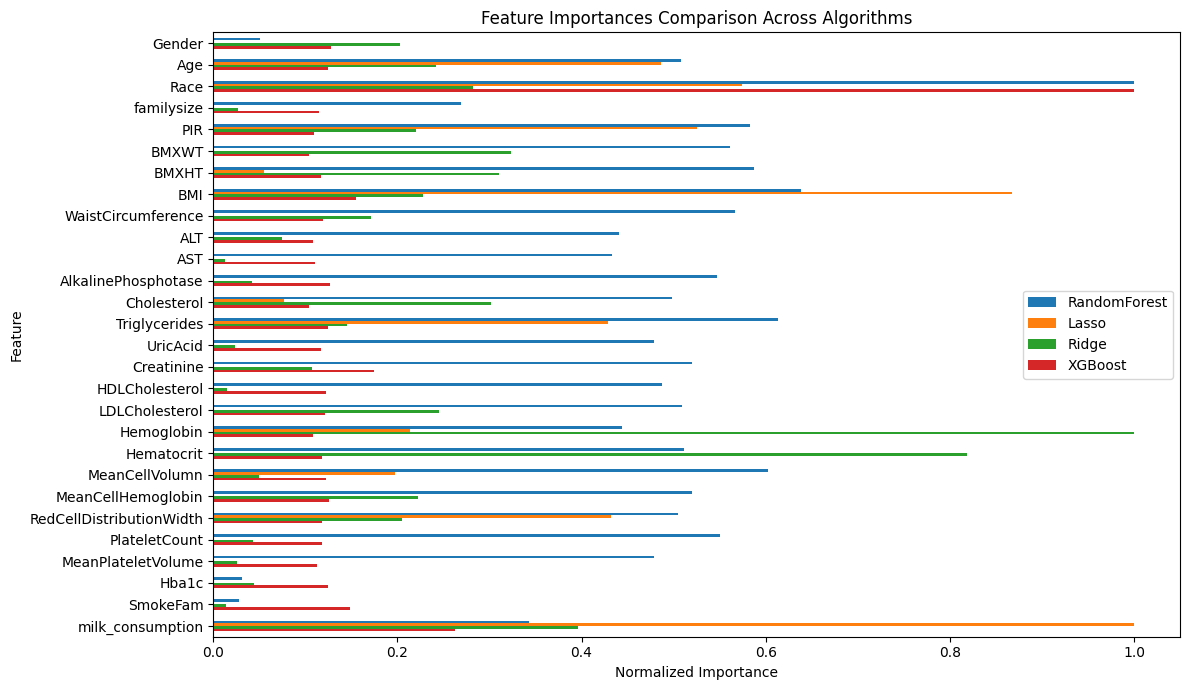

                     Feature  RandomForest     Lasso     Ridge   XGBoost
2                       Race      1.000000  0.574007  0.281623  1.000000
7                        BMI      0.637972  0.867836  0.228286  0.154682
13             Triglycerides      0.613219  0.428431  0.144895  0.124163
20            MeanCellVolumn      0.602695  0.197073  0.049642  0.122919
6                      BMXHT      0.586818  0.055054  0.310772  0.117231
4                        PIR      0.583335  0.525860  0.219778  0.109069
8         WaistCircumference      0.566947  0.000000  0.171247  0.119250
5                      BMXWT      0.560968  0.000000  0.323451  0.103652
23             PlateletCount      0.550031  0.000000  0.043193  0.117563
11       AlkalinePhosphotase      0.547287  0.000000  0.042158  0.127063
21        MeanCellHemoglobin      0.520253  0.000000  0.222179  0.125882
15                Creatinine      0.519984  0.000000  0.106703  0.174387
19                Hematocrit      0.511660  0.00000

In [122]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso, Ridge, LogisticRegression
import xgboost as xgb
import matplotlib.pyplot as plt

# Load dataset

X = df.drop(columns=['label', 'YearStart', 'YearID', 'VitaminD'])  # Drop non-features
y = df['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Standardize for linear models
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# 1. Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_importance = rf.feature_importances_

# 2. Lasso
lasso = Lasso(alpha=0.01)
lasso.fit(X_scaled, y_train)
lasso_importance = np.abs(lasso.coef_)

# 3. Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_scaled, y_train)
ridge_importance = np.abs(ridge.coef_)

# 4. XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
xgb_importance = xgb_model.feature_importances_

# Aggregate results into a DataFrame
feature_names = X.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'RandomForest': rf_importance,
    'Lasso': lasso_importance,
    'Ridge': ridge_importance,
    'XGBoost': xgb_importance
})

# Normalize for visualization
for col in ['RandomForest', 'Lasso', 'Ridge', 'XGBoost']:
    importance_df[col] = importance_df[col] / importance_df[col].max()

# Plot top 10 features by Random Forest
top_features = importance_df.sort_values(by='RandomForest', ascending=False).head(30)['Feature']

importance_df_top = importance_df[importance_df['Feature'].isin(top_features)]

importance_df_top.set_index('Feature').plot(kind='barh', figsize=(12, 7))
plt.title("Feature Importances Comparison Across Algorithms")
plt.xlabel("Normalized Importance")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Print all results
print(importance_df.sort_values(by='RandomForest', ascending=False).head(30))


In [ ]:
import pandas as pd
from scipy.stats import ttest_ind, chi2_contingency

# Giả sử bạn đã có DataFrame tên là df_train
categorical_features = ['Gender', 'Race', 'SmokeFam', 'milk_consumption']
continuous_features = [
    'Age', 'BMI', 'FastingGlucose', 'PIR',
    'Triglycerides', 'Creatinine', 'HDLCholesterol',
    'Hemoglobin', 'MeanCellVolumn', 'RedCellDistributionWidth'
]

results = []

# Thay ANOVA bằng t-test cho biến liên tục
for feature in continuous_features:
    group0 = df_train[df_train['label'] == 0][feature].dropna()
    group1 = df_train[df_train['label'] == 1][feature].dropna()
    stat, p = ttest_ind(group0, group1, equal_var=False)  # sử dụng Welch's t-test (không giả định phương sai bằng nhau)
    results.append({
        'Feature': feature,
        'Type': 'Continuous',
        'Test': 't-test',
        'p-value': p
    })

# Chi-square cho biến phân loại (giữ nguyên)
for feature in categorical_features:
    contingency_table = pd.crosstab(df_train[feature], df_train['label'])
    stat, p, dof, expected = chi2_contingency(contingency_table)
    results.append({
        'Feature': feature,
        'Type': 'Categorical',
        'Test': 'Chi-square',
        'p-value': p
    })

results_df = pd.DataFrame(results)
print(results_df.sort_values('p-value'))


In [123]:
df.drop(columns=['Cholesterol', 'BMXWT', 'BMXHT', "YearID"], inplace=True)

# save to csv
df.to_csv(r'c:\mydata\G8Vitamin\data\final\08062025_Hba1c\processed_train.csv', index=False)

In [124]:
df.columns

Index(['Gender', 'Age', 'Race', 'familysize', 'PIR', 'BMI',
       'WaistCircumference', 'ALT', 'AST', 'AlkalinePhosphotase',
       'Triglycerides', 'UricAcid', 'Creatinine', 'HDLCholesterol',
       'LDLCholesterol', 'Hemoglobin', 'Hematocrit', 'MeanCellVolumn',
       'MeanCellHemoglobin', 'RedCellDistributionWidth', 'PlateletCount',
       'MeanPlateletVolume', 'Hba1c', 'VitaminD', 'SmokeFam',
       'milk_consumption', 'YearStart', 'label'],
      dtype='object')

## Simple test preparation

In [125]:
df1 = df_final_test.copy()

In [126]:
remove_columns = ['Cholesterol', 'BMXWT', 'BMXHT', "YearID","HBsAg"]
df1.drop(columns = remove_columns,inplace=True)

In [128]:
df1.dropna(inplace=True)

In [129]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3045 entries, 23838 to 30064
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SEQN                      3045 non-null   float64
 1   Gender                    3045 non-null   float64
 2   Age                       3045 non-null   float64
 3   Race                      3045 non-null   float64
 4   familysize                3045 non-null   float64
 5   PIR                       3045 non-null   float64
 6   BMI                       3045 non-null   float64
 7   WaistCircumference        3045 non-null   float64
 8   FastingGlucose            3045 non-null   float64
 9   ALT                       3045 non-null   float64
 10  AST                       3045 non-null   float64
 11  AlkalinePhosphotase       3045 non-null   float64
 12  Triglycerides             3045 non-null   float64
 13  UricAcid                  3045 non-null   float64
 14  Creatini

In [130]:
df1['Hba1c'] = df['Hba1c'].apply(isDiabete)

In [131]:
df1.to_csv(r'c:\mydata\G8Vitamin\data\final\08062025_Hba1c\processed_test.csv', index=False)